## <center><span style=color:green>EDA-4. СТАТИСТИЧЕСКИЕ ТЕСТЫ (HW-03)

In [316]:
# Установка используемых библиотек
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore') # отключение warnings

### <center>1. Объединение двух массивов в DataFrame

In [317]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
df = pd.DataFrame({'petersburg': pd.Series(petersburg), 
                     'magadan': pd.Series(magadan)})
df

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,NaN,0.0689


Так как размеры выборок для разных городам не совпадают, то можно вставить вместо недостающего значения среднюю величину размера раковины.

In [318]:
#создаем словарь для замены пропуска
# {имя столбца: средняя величина раковины}
values = {'petersburg': round(df['petersburg'].mean(), 4)}

#заполняем пропуск в соответствии с заявленным словарем
df = df.fillna(values)
df

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,0.1034,0.0689


### <center>2. Выбор теста на корреляцию

Прежде чем выбрать тест на корреляцию сначала нужно понять, какому распределению эти данные следуют. Для количественной оценки того, выглядит ли выборка данных так, как если бы она была взята из **распределения Гаусса** используем два теста на нормальность: 

* тест Шапиро-Уилка
* тест Д’Агостино

In [319]:
H0 = 'Распределение нормально. Мы не можем отвергнуть нулевую гипотезу.'
Ha = 'Распределение ненормально. Мы отвергаем нулевую гипотезу.'
alpha = 0.05

In [320]:
_, p = shapiro(df)
print('p = %.3f' % p)

# Интерпретация
if p > alpha:
	print(f"{round(p, 3)} > {alpha} {H0}")
else:
	print(f"{round(p, 3)} <= {alpha} {Ha}")

p = 0.100
0.1 > 0.05 Распределение нормально. Мы не можем отвергнуть нулевую гипотезу.


In [321]:
_, p = normaltest(df)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p = %.3f' % p[0])

# Интерпретация 
if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p = 0.042
Распределение нормально. Мы не можем отвергнуть нулевую гипотезу.


Для количественных данных с нормальным распределением используются параметрические тесты (наиболее распространённые - **корреляционные** и **сравнительные**).

**Корреляционные** тесты проверяют, связаны ли переменные, не выдвигая гипотезы о причинно-следственной связи. Наиболее распространённым является *параметрический тест на корреляцию Пирсона*.

In [322]:
cor = df.corr()
print(round(cor, 3))

            petersburg  magadan
petersburg       1.000    0.245
magadan          0.245    1.000


<AxesSubplot: xlabel='petersburg', ylabel='magadan'>

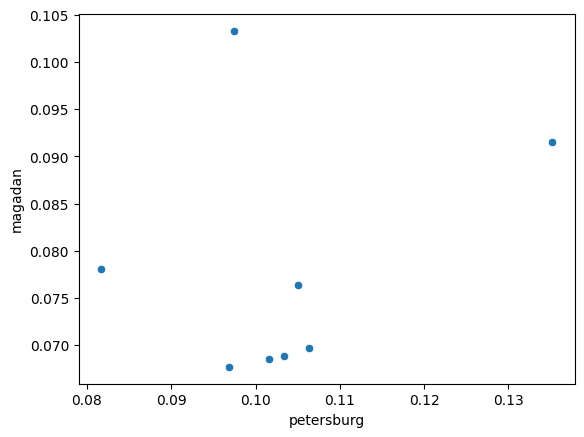

In [323]:
sns.scatterplot(data=df, x="petersburg", y="magadan")

Значение коэффициента корреляции 0.245 говорит нам об отсутствии связи или очень слабой связи между признаками в группах.

Выбираем **сравнительный** тест:

Данные распределены по нормальному закону: *да* -> **Параметрический тест** -> Тип зависимой переменной (размер раковины): *количественная* -> **Тест на сравнение выборки** -> Сколько групп сравнивается (peterburg и magadan): *2* -> Сколько объектов в выборке (8): *<30* -> ***Независимый Т-тест***

>**Независимый T-тест** проверяет разницу между одной и той же переменной из разных совокупностей (petersburg и magadan).

In [324]:
H0 = 'Нет значимой разницы между размером раковины в разных городах.'
Ha = 'Есть значимая разница между размером раковины в разных городах.'

In [325]:
def t_test(data):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(df['petersburg'], data['magadan'], equal_var=True)

    p = round(test_results[1], 3)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(df)


*** Результаты независимого T-теста ***
0.003 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между размером раковины в разных городах.


Оцениваем разницу среднего размера раковины для представленных городов.

In [326]:
print(f'Среднее значение размера раковины в petersburg составляет: %.3f' %df.petersburg.mean())
print(f'Среднее значение размера раковины в petersburg составляет: %.3f' %df.magadan.mean())
print(f'Разница между средними величинами раковины составляет: %.3f' %(df.petersburg.mean() - df.magadan.mean()))

Среднее значение размера раковины в petersburg составляет: 0.103
Среднее значение размера раковины в petersburg составляет: 0.078
Разница между средними величинами раковины составляет: 0.025


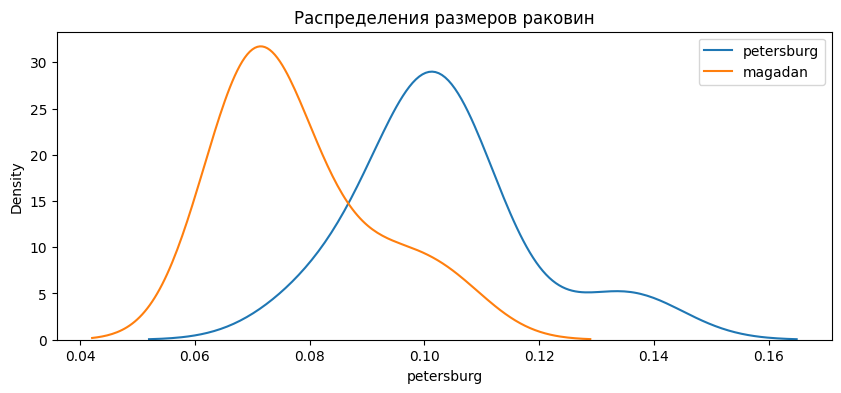

In [327]:
# оценим распределения размера раковины в разных городах визуально
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 4))
ax1.set_title('Распределения размеров раковин')

sns.kdeplot(df['petersburg'], ax=ax1, label ='petersburg')
sns.kdeplot(df['magadan'], ax=ax1, label ='magadan')
plt.legend()

Подводим итог, из предоставленных данным мы собрали DataFrame, данные в нем распределены нормально.

Был проведен независимый т-тест для проверки гипотезы, что нет заначимой разницы в размере раковины мидии в зависимости от города произодителя. Эту гипотезу удалось опровегнуть. 

Следовательно, делаем вывод, что есть значимая разница между размером раковины в разных городах на основании предоставленных данных.